Beginning the project this is my first Model of ML for the EEG dataset

In [3]:
#Reading in the data, checking and data cleaning
import pandas as pd
EEGdata = pd.read_csv('Epileptic_data.csv')
EEGdata.head()

#Check for any missing values
missing_values = EEGdata.isnull().sum()
print(missing_values)

ID       0
pow_d    0
fr_d     0
cd1_d    0
cd2_d    0
cd3_d    0
cd4_d    0
cd5_d    0
cd6_d    0
pow_t    0
fr_t     0
cd1_t    0
cd2_t    0
cd3_t    0
cd4_t    0
cd5_t    0
cd6_t    0
pow_a    0
fr_a     0
cd1_a    0
cd2_a    0
cd3_a    0
cd4_a    0
cd5_a    0
cd6_a    0
pow_b    0
fr_b     0
cd1_b    0
cd2_b    0
cd3_b    0
cd4_b    0
cd5_b    0
cd6_b    0
pow_g    0
fr_g     0
cd1_g    0
cd2_g    0
cd3_g    0
cd4_g    0
cd5_g    0
cd6_g    0
stat     0
dtype: int64


In [4]:
#Checking for any duplicates, removing where necessary & after this I will probably look for any outliers, I put an if else to
#refine the code more so it didnt get so jumbled when I ran the code
duplicates = EEGdata.duplicated().sum()
print(f"No of duplicates per row: {duplicates}")

if duplicates > 0:
    EEGdata.drop_duplicates()
    print("Duplicates found and removed.")
else:
    print("No duplicates in dataset")

#There was no duplicates so there is nothing to drop
#This is a weird one but I checked for any inconsistencies in the labels
print("Class label distr:")
print(EEGdata.value_counts())

#Then I imported another library "scipy.stats" for the zscore to be used for all numerical columns; I then set the threshold
#to be 3 standard deviations (SDev's away from mean) away form the mean and rmeoved any rows where any features had a higher
#threshold than the Z-score
from scipy.stats import zscore
z_scores =EEGdata.select_dtypes(include=['number']).apply(zscore)
threshold = 3
outliers = (z_scores.abs() > threshold).sum()

print(outliers)

No of duplicates per row: 0
No duplicates in dataset
Class label distr:
ID   pow_d     fr_d      cd1_d     cd2_d      cd3_d       cd4_d     cd5_d     cd6_d     pow_t      fr_t     cd1_t       cd2_t      cd3_t     cd4_t      cd5_t      cd6_t      pow_a     fr_a     cd1_a     cd2_a     cd3_a     cd4_a      cd5_a     cd6_a      pow_b     fr_b    cd1_b     cd2_b      cd3_b       cd4_b     cd5_b      cd6_b     pow_g     fr_g    cd1_g      cd2_g     cd3_g     cd4_g     cd5_g     cd6_g     stat
103  1153.500  1.977400   245.120  -21.0780   -70.71700    216.200   71.423   -7.8824   744.470    2.03730   0.76387    -77.8250   -119.180  -156.2900  -277.3000   168.6400  6908.60   2.31910   172.370   113.210   116.970   87.9530   -139.210   21.5710   80741.00  2.8007  -409.190   68.3210    19.44100   -132.240   434.8600  -56.543   236.94    3.3751  -325.8100  -186.170  -124.850   287.340   351.160  -503.040  2       1
663  372.070   2.146300  -68.781   -183.9200  -1.49350    -79.801   -164.370   28

(198, 42)
Train set: 138 samples
Test set: 60 samples


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


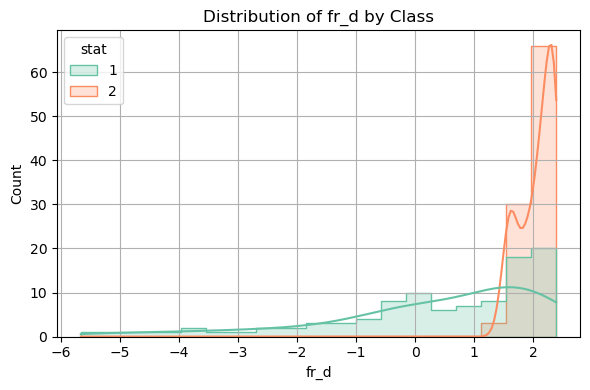

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


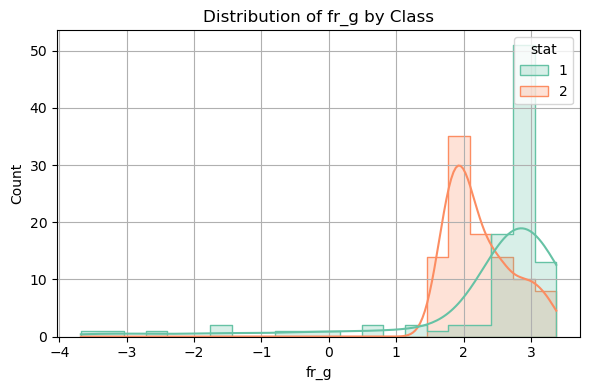

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


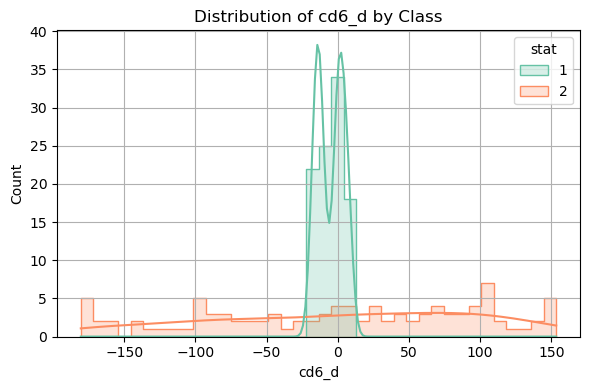

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


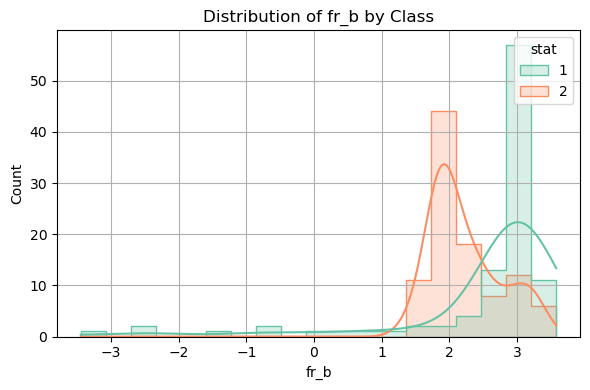

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


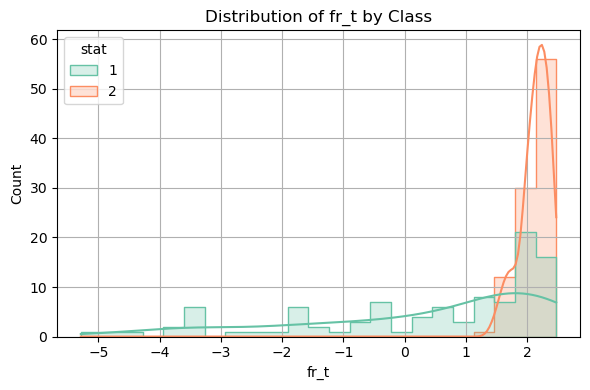

In [5]:
##Loading libraries, spliting and normalising dataset to be used throughout all models.
#Loaded in my libraries and dataset before splitting it to features and targets; I did all columns except the last and the last column
#I put as the target, 70/30 is the most common split to balance training sizes. Stratifying this ensures the classes are balanced  and
#preserved in both train/test sets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#I then check the dataset shape before, normalising, splitting the EEGdata into a train and test; printing to check it is correct then.
print(EEGdata.shape)
X = EEGdata.iloc[:, :-1]
y = EEGdata.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

#Scaling it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Histogram/Distribution of the EEG features both Pre and Post scaling
top_features = ['fr_d', 'fr_g', 'cd6_d', 'fr_b', 'fr_t']
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(EEGdata, x=feature, hue='stat', kde=True, element="step", palette="Set2")
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
#Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif
print(EEGdata.columns)
X = EEGdata.drop('stat', axis=1)
y = EEGdata['stat']
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Index(['ID', 'pow_d', 'fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd4_d', 'cd5_d',
       'cd6_d', 'pow_t', 'fr_t', 'cd1_t', 'cd2_t', 'cd3_t', 'cd4_t', 'cd5_t',
       'cd6_t', 'pow_a', 'fr_a', 'cd1_a', 'cd2_a', 'cd3_a', 'cd4_a', 'cd5_a',
       'cd6_a', 'pow_b', 'fr_b', 'cd1_b', 'cd2_b', 'cd3_b', 'cd4_b', 'cd5_b',
       'cd6_b', 'pow_g', 'fr_g', 'cd1_g', 'cd2_g', 'cd3_g', 'cd4_g', 'cd5_g',
       'cd6_g', 'stat'],
      dtype='object')
Selected Features: Index(['fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd5_d', 'cd6_d', 'fr_t', 'cd1_t',
       'fr_a', 'fr_g'],
      dtype='object')


LR Accuracy: 0.9667
LR ROC AUC Score: 0.9944
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        30
           2       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<Figure size 600x400 with 0 Axes>

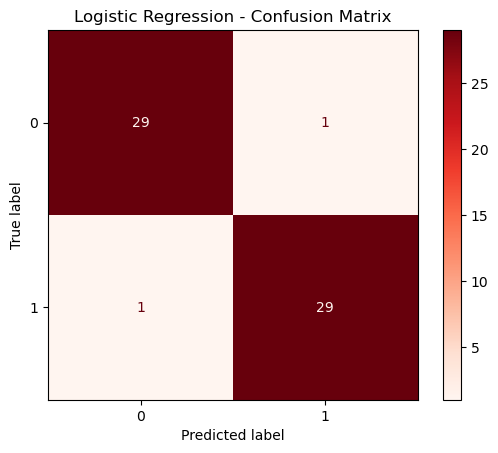

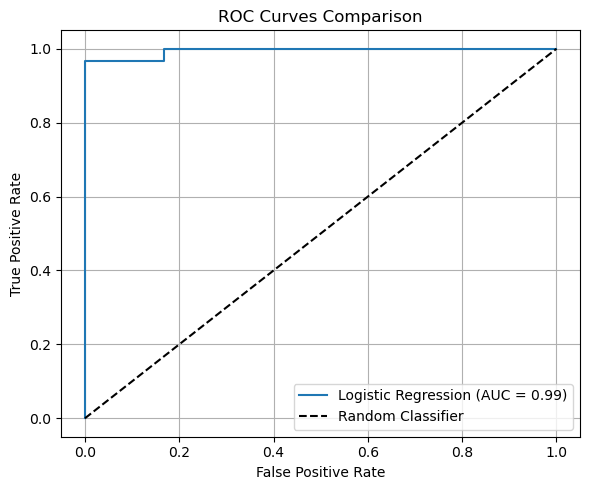

Cross-validation accuracy: 0.9783 ± 0.0177


In [7]:
##Model 1a - Logistic Regression on ALL FEATURES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)

#Features and labels for the EEG data & checking the train-test split
EEGdata = pd.read_csv('Epileptic_data.csv')
X = EEGdata.drop(['ID', 'stat'], axis=1)
y = EEGdata['stat']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=60, random_state=42, stratify=y)
#Feature scaling and hyperparameteric tuning using the best LR model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']}
grid_LR = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_LR.fit(X_train_scaled, y_train)
LRmodel = grid_LR.best_estimator_

#Getting my predictions, evaluated and printed results
y_pred = LRmodel.predict(X_test_scaled)
y_prob = LRmodel.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred)

print(f'LR Accuracy: {accuracy:.4f}')
print(f'LR ROC AUC Score: {roc_auc:.4f}')
print('Classification Report:\n', report)

###Evaluation visualisation
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp =ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Reds')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

#ROC Curve
y_test_binary = y_test.replace({1: 0, 2: 1})#1 = epilepsy(+) and 0 = no epilepsy
def plot_roc_curves(models, y_test, title='ROC Curves Comparison'):
    plt.figure(figsize=(6, 5))
    for name, model, X_t in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_t)[:, 1]
        else:
            y_prob = model.decision_function(X_t)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_val:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves([('Logistic Regression', LRmodel, X_test_scaled)], y_test_binary)

#Making a cross-validation function
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

mean_acc, std_acc = cross_validate_model(LRmodel, X_train_scaled, y_train)
print(f"Cross-validation accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

LR Accuracy (selected features): 0.9667
LR ROC AUC Score (selected features): 0.9922
Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        30
           2       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<Figure size 600x400 with 0 Axes>

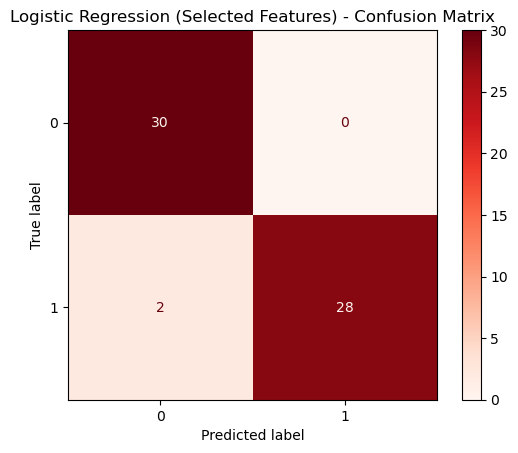

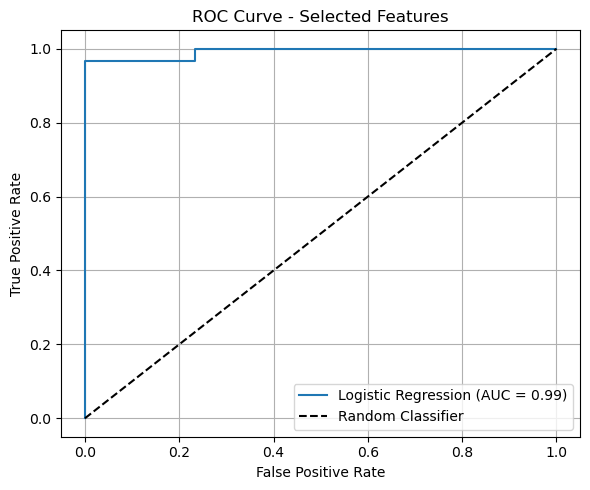

Cross-validation accuracy (selected features): 0.9857 ± 0.0175


In [8]:
#Model 1B - Logistic Regression on Selected Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)

#Loading in my data and using only the selected features choosen by SelectKBest
EEGdata = pd.read_csv('Epileptic_data.csv')
selected_features = ['fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd5_d', 'cd6_d', 'fr_t', 'cd1_t', 'fr_a', 'fr_g']
X = EEGdata[selected_features]
y = EEGdata['stat']

# Train-test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=60, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']}
grid_LR = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_LR.fit(X_train_scaled, y_train)
LRmodel = grid_LR.best_estimator_

# Predictions & evaluation
y_pred = LRmodel.predict(X_test_scaled)
y_prob = LRmodel.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test.replace({1: 0, 2: 1}), y_prob)  # Assuming binary classification
report = classification_report(y_test, y_pred)
print(f'LR Accuracy (selected features): {accuracy:.4f}')
print(f'LR ROC AUC Score (selected features): {roc_auc:.4f}')
print('Classification Report:\n', report)

##Visualisation of results
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Reds')
plt.title('Logistic Regression (Selected Features) - Confusion Matrix')
plt.show()

#ROC Curve
y_test_binary = y_test.replace({1: 0, 2: 1})  # Assuming class 2 is epilepsy (+)
def plot_roc_curves(models, y_test, title='ROC Curve - Selected Features'):
    plt.figure(figsize=(6, 5))
    for name, model, X_t in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_t)[:, 1]
        else:
            y_prob = model.decision_function(X_t)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_val:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves([('Logistic Regression', LRmodel, X_test_scaled)], y_test_binary)

#Cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

mean_acc, std_acc = cross_validate_model(LRmodel, X_train_scaled, y_train)
print(f"Cross-validation accuracy (selected features): {mean_acc:.4f} ± {std_acc:.4f}")

Train set: 138 samples
Test set: 60 samples
RF Accuracy: 0.9833
RF ROC AUC Score: 0.9989
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<Figure size 600x400 with 0 Axes>

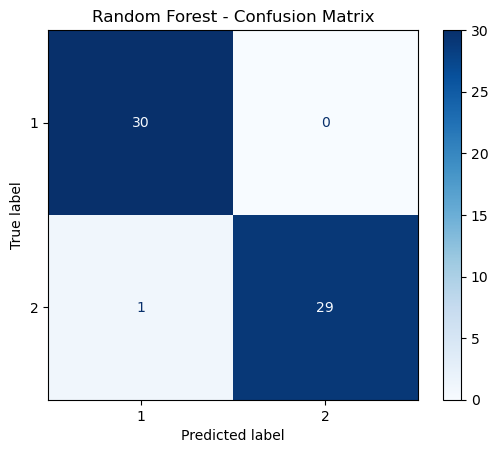

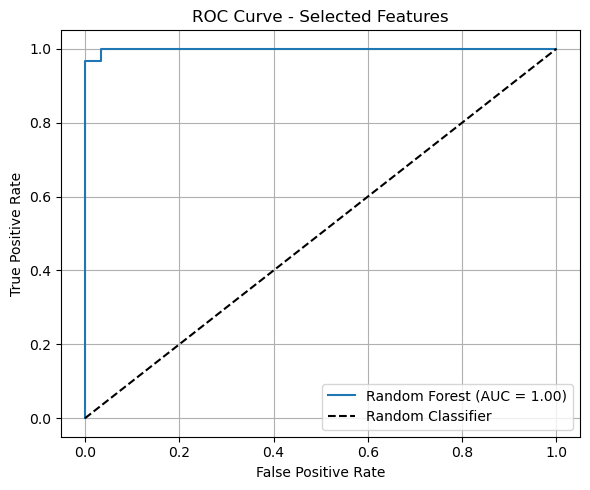

Cross-validation accuracy: 0.9929 ± 0.0143


In [9]:
#Model 2A - Random Forest with tuning
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay)

#Model 2: Random Forest Classifier
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
RFmodel.fit(X_train, y_train)

#Similar to the previous with predictions, evaluation and confusion matric
y_pred_rf = RFmodel.predict(X_test)
y_prob_rf = RFmodel.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)
rf_report = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFmodel.classes_)

#printing results and cm plot
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f'RF Accuracy: {rf_accuracy:.4f}')
print(f'RF ROC AUC Score: {rf_roc_auc:.4f}')
print('Classification Report:\n', rf_report)

####Evaluation visualisation
#Confusion Matrix
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()

#Making sure I have fitted the label again before running my functions for ROC
#Curve and Cross validation
y_test_binary = y_test.replace({1: 0, 2: 1})
plot_roc_curves([('Random Forest', RFmodel, X_test)], y_test_binary)
mean_acc, std_acc = cross_validate_model(RFmodel, X_train, y_train)
print(f"Cross-validation accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

#Possible overfitting this is too perfect of a perfromance on the test set:
#Possibly because my test dataset is only 60 right now and the model may have
#overfit the training data. This is a limitation.

RF Accuracy (selected features): 0.9833
RF ROC AUC Score (selected features): 0.9989
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<Figure size 600x400 with 0 Axes>

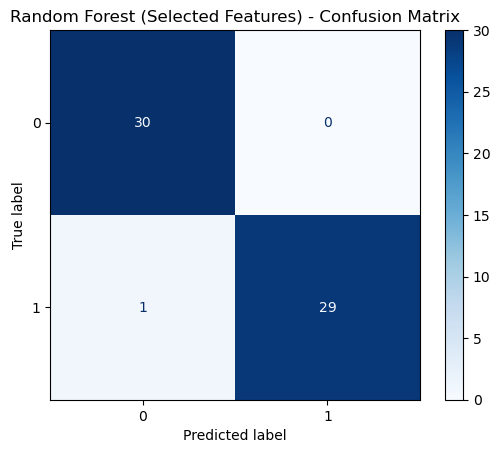

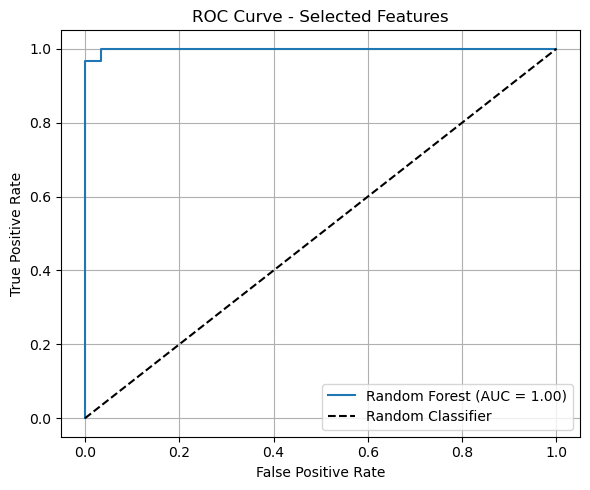

Cross-validation accuracy (selected features): 0.9929 ± 0.0143


In [10]:
#Model 2B – Random Forest Classifier with selected features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)
from sklearn.preprocessing import StandardScaler

#Load data and selected features
EEGdata = pd.read_csv('Epileptic_data.csv')
selected_features = ['fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd5_d', 'cd6_d', 'fr_t', 'cd1_t', 'fr_a', 'fr_g']
X = EEGdata[selected_features]
y = EEGdata['stat']

#Train-test split, scaling and training Random Forest 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=60, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
RFmodel.fit(X_train_scaled, y_train)

#Predictions & evaluation
y_pred_rf = RFmodel.predict(X_test_scaled)
y_prob_rf = RFmodel.predict_proba(X_test_scaled)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test.replace({1: 0, 2: 1}), y_prob_rf)
rf_report = classification_report(y_test, y_pred_rf)

print(f'RF Accuracy (selected features): {rf_accuracy:.4f}')
print(f'RF ROC AUC Score (selected features): {rf_roc_auc:.4f}')
print('Classification Report:\n', rf_report)

##Visualisation
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues')
plt.title('Random Forest (Selected Features) - Confusion Matrix')
plt.show()

#ROC Curve
y_test_binary = y_test.replace({1: 0, 2: 1})
def plot_roc_curves(models, y_test, title='ROC Curve - Selected Features'):
    plt.figure(figsize=(6, 5))
    for name, model, X_t in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_t)[:, 1]
        else:
            y_prob = model.decision_function(X_t)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_val:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves([('Random Forest', RFmodel, X_test_scaled)], y_test_binary)

#Cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

mean_acc, std_acc = cross_validate_model(RFmodel, X_train_scaled, y_train)
print(f"Cross-validation accuracy (selected features): {mean_acc:.4f} ± {std_acc:.4f}")

Class distr:
 stat
1    99
2    99
Name: count, dtype: int64
SVM + KNN Accuracy: 0.9833
SVM + KNN ROC AUC Score: 1.0000
SVM + KNN Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<Figure size 600x400 with 0 Axes>

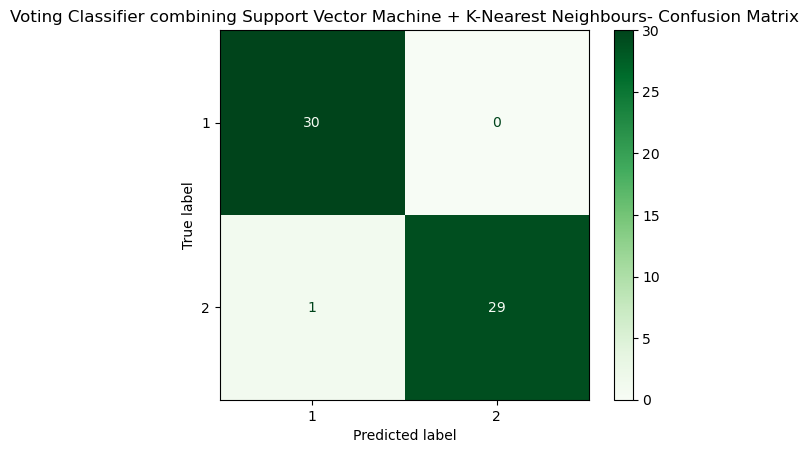

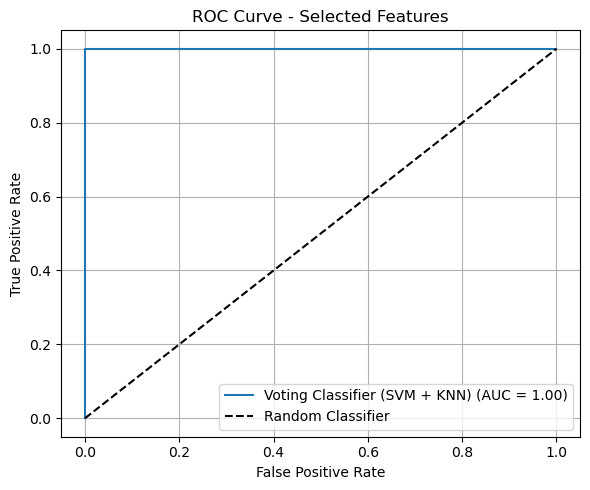

Cross-Validated Accuracy: 0.9780 ± 0.0179


In [11]:
#Model 3A - Support Vector Model and K Nearest Neighbours with a Voting Classifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier

#Rereviwing the structure of my dataset with a dataset shape before spliting the fetaures, labels & scaling the data
print("Class distr:\n", EEGdata.iloc[:, -1].value_counts())
features = EEGdata.iloc[:, :-1]
labels = EEGdata.iloc[:, -1]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Looking for the top 10 features
feature_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

#Actually creating the model it is a bit of SVM & KNN with VotingClassifier
svm_clf =SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

#Attempting the voting element
SVMKNN= VotingClassifier(estimators=[('svm', svm_clf),('knn', knn_clf)], voting='soft')
SVMKNN.fit(X_train_selected, y_train)

#Doing the final steps of my predictions, evaluation, confusion matrix before, printing the resulting metric
#and plotting the confusion matrix
y_pred_voting = SVMKNN.predict(X_test_selected)
y_prob_voting = SVMKNN.predict_proba(X_test_selected)[:, 1]
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_roc_auc = roc_auc_score(y_test, y_prob_voting)
voting_report = classification_report(y_test, y_pred_voting)


##Evaluation Visualisation
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVMKNN.classes_)
print(f'SVM + KNN Accuracy: {voting_accuracy:.4f}')
print(f'SVM + KNN ROC AUC Score: {voting_roc_auc:.4f}')
print('SVM + KNN Classification Report:\n', voting_report)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Greens')
plt.title('Voting Classifier combining Support Vector Machine + K-Nearest Neighbours- Confusion Matrix')
plt.show()

#ROC Curve
plot_roc_curves([
    ('Voting Classifier (SVM + KNN)', SVMKNN, X_test_selected)
], y_test_binary)

#Cross-validation
mean_acc, std_acc = cross_validate_model(SVMKNN, X_train_selected, y_train)
print(f"Cross-Validated Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

#This is based on the same scaled data so both the distribution and feature importance isn't exactly necessary

SVM + KNN Accuracy (selected features): 0.9667
SVM + KNN ROC AUC Score (selected features): 0.9933
SVM + KNN Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        30
           2       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<Figure size 600x400 with 0 Axes>

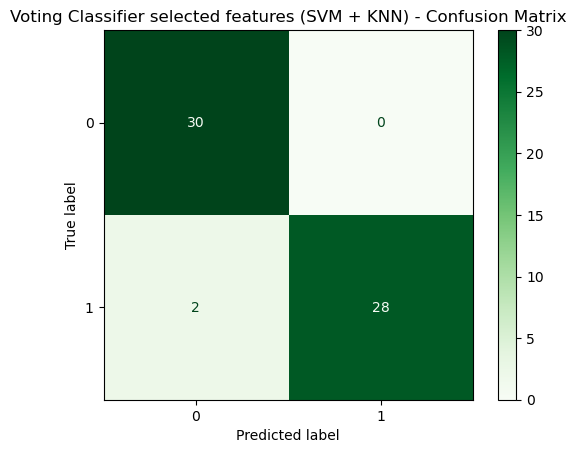

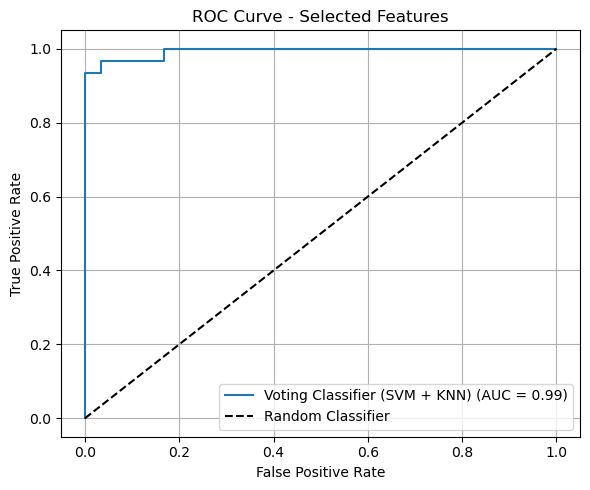

Cross-validation accuracy (selected features): 0.9783 ± 0.0177


In [12]:
#Model 3B – Support Vector Model and K Nearest Neighbours with a Voting Classifier using selected features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)

#Preparing the selected features using ANOVA F-value
X = EEGdata.drop(['ID', 'stat'], axis=1)
y = EEGdata['stat']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=60, random_state=42, stratify=y)

#Scale my data and feature selecting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

#Classifiers followed by Voting classfier
svm_clf = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
SVMKNN = VotingClassifier(estimators=[('svm', svm_clf), ('knn', knn_clf)], voting='soft')
SVMKNN.fit(X_train_selected, y_train)

#Predictions & evaluation
y_pred_voting = SVMKNN.predict(X_test_selected)
y_prob_voting = SVMKNN.predict_proba(X_test_selected)[:, 1]
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_roc_auc = roc_auc_score(y_test.replace({1: 0, 2: 1}), y_prob_voting)
voting_report = classification_report(y_test, y_pred_voting)

print(f'SVM + KNN Accuracy (selected features): {voting_accuracy:.4f}')
print(f'SVM + KNN ROC AUC Score (selected features): {voting_roc_auc:.4f}')
print('SVM + KNN Classification Report:\n', voting_report)

##Visualisation
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Greens')
plt.title('Voting Classifier selected features (SVM + KNN) - Confusion Matrix')
plt.show()

#ROC Curve & cross-validation
y_test_binary = y_test.replace({1: 0, 2: 1})
def plot_roc_curves(models, y_test, title='ROC Curve - Selected Features'):
    plt.figure(figsize=(6, 5))
    for name, model, X_t in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_t)[:, 1]
        else:
            y_prob = model.decision_function(X_t)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_val:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves([('Voting Classifier (SVM + KNN)', SVMKNN, X_test_selected)], y_test_binary)

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

mean_acc, std_acc = cross_validate_model(SVMKNN, X_train_selected, y_train)
print(f"Cross-validation accuracy (selected features): {mean_acc:.4f} ± {std_acc:.4f}")

Accuracy: 0.9667
ROC AUC Score: 0.9989
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        30
           2       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<Figure size 600x400 with 0 Axes>

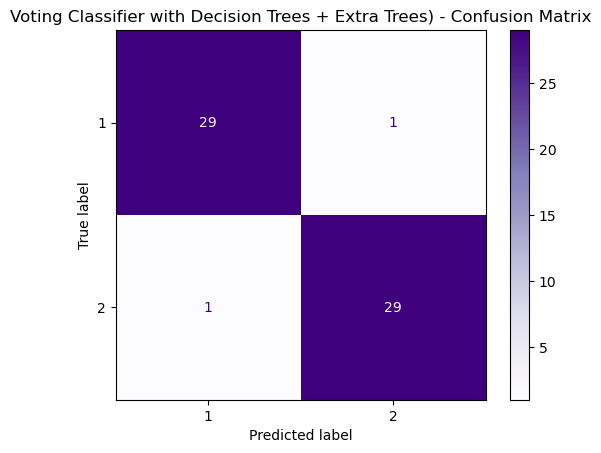

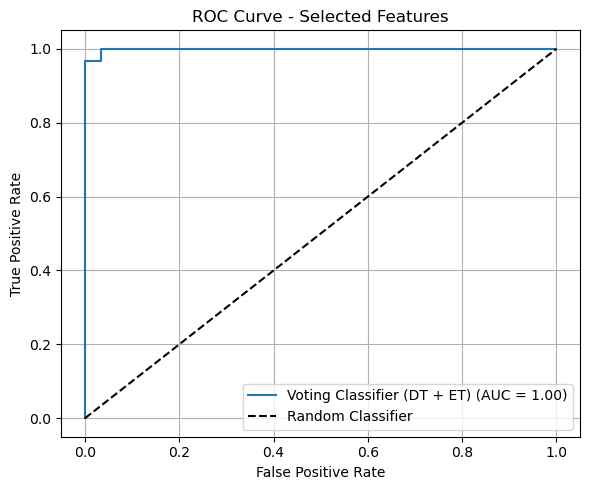

Voting Classifier (DT + ET) Cross-Validated Accuracy: 0.9714 ± 0.0416


In [13]:
#Model 4 - Decision Trees and Extra Trees with a Voting Classifier
#Loading my imports and defining ym feature function
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
def plot_feature_importance(model, feature_names, top_n=10, title="Top Features"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:][::-1]  # Top N descending

    plt.figure(figsize=(8, 5))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="mako")
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Creating a 4th model on Decision trees (DT) & Extra Trees (ET) using the same voting system
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
clf_et = ExtraTreesClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
DTET = VotingClassifier(estimators=[('dt', clf_dt), ('et', clf_et)], voting='soft')
DTET.fit(X_train, y_train)

#Predictions, evaluations and print
y_pred_voting = DTET.predict(X_test)
y_prob_voting = DTET.predict_proba(X_test)[:, 1]
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_roc_auc = roc_auc_score(y_test, y_prob_voting)
voting_report = classification_report(y_test, y_pred_voting)

##Evaluation Visualisation
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTET.classes_)
print(f'Accuracy: {voting_accuracy:.4f}')
print(f'ROC AUC Score: {voting_roc_auc:.4f}')
print('Classification Report:\n', voting_report)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Purples')
plt.title('Voting Classifier with Decision Trees + Extra Trees) - Confusion Matrix')
plt.show()

#ROC Curve & cross-validation
plot_roc_curves([('Voting Classifier (DT + ET)', DTET, X_test)], y_test_binary)
mean_acc, std_acc = cross_validate_model(DTET, X_train, y_train)
print(f"Voting Classifier (DT + ET) Cross-Validated Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
##Again possible overfitting this is too perfect of a performance going to include a cross-validation for this and Model 2

DT + ET Voting Accuracy (selected features): 0.9833
DT + ET ROC AUC Score (selected features): 1.0000
DT + ET Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<Figure size 600x400 with 0 Axes>

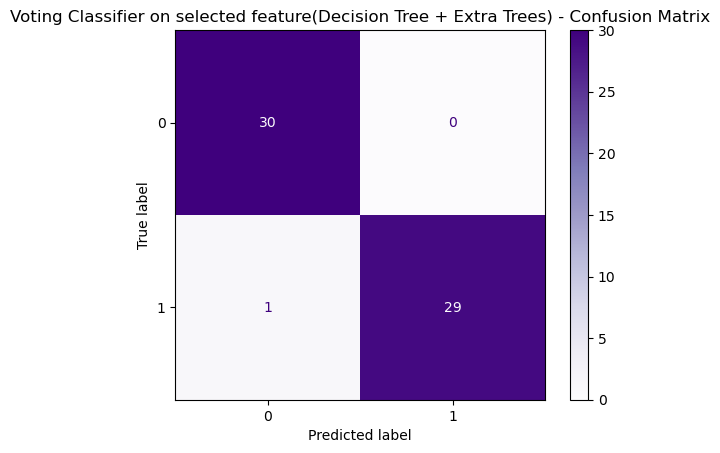

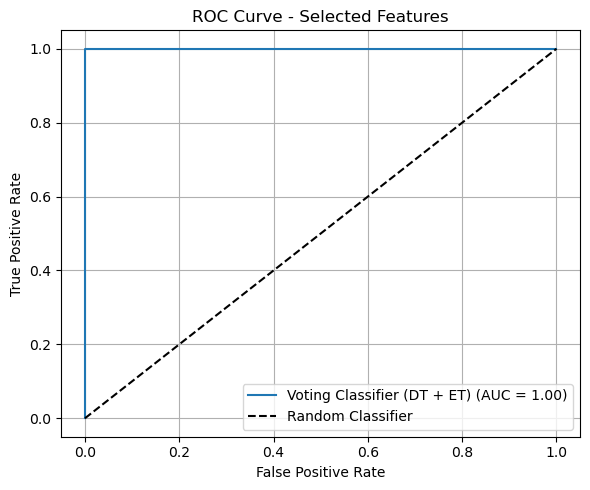

Cross-validation accuracy (selected features): 0.9857 ± 0.0175


In [14]:
#Model 4B - Voting Classifier (Decision Tree + Extra Trees) on Selected Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)

#Load data
EEGdata = pd.read_csv('Epileptic_data.csv')
X = EEGdata.drop(['ID', 'stat'], axis=1)
y = EEGdata['stat']

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=60, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using ANOVA F-value
feature_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)
selected_feature_names = X.columns[feature_selector.get_support()]

# Define base models
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
clf_et = ExtraTreesClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)

# Voting Classifier
DTET = VotingClassifier(estimators=[('dt', clf_dt), ('et', clf_et)], voting='soft')
DTET.fit(X_train_selected, y_train)

# Predictions & evaluation
y_pred_voting = DTET.predict(X_test_selected)
y_prob_voting = DTET.predict_proba(X_test_selected)[:, 1]
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_roc_auc = roc_auc_score(y_test.replace({1: 0, 2: 1}), y_prob_voting)
voting_report = classification_report(y_test, y_pred_voting)

print(f'DT + ET Voting Accuracy (selected features): {voting_accuracy:.4f}')
print(f'DT + ET ROC AUC Score (selected features): {voting_roc_auc:.4f}')
print('DT + ET Classification Report:\n', voting_report)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Purples')
plt.title('Voting Classifier on selected feature(Decision Tree + Extra Trees) - Confusion Matrix')
plt.show()

#ROC Curve and cross-validation
y_test_binary = y_test.replace({1: 0, 2: 1})
def plot_roc_curves(models, y_test, title='ROC Curve - Selected Features'):
    plt.figure(figsize=(6, 5))
    for name, model, X_t in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_t)[:, 1]
        else:
            y_prob = model.decision_function(X_t)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_val:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves([('Voting Classifier (DT + ET)', DTET, X_test_selected)], y_test_binary)

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

mean_acc, std_acc = cross_validate_model(DTET, X_train_selected, y_train)
print(f"Cross-validation accuracy (selected features): {mean_acc:.4f} ± {std_acc:.4f}")

SVM Accuracy: 0.6333
SVM ROC AUC Score: 0.7044
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.70      0.66        30
           2       0.65      0.57      0.61        30

    accuracy                           0.63        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.63      0.63        60

Confusion Matrix:
 [[21  9]
 [13 17]]


<Figure size 600x400 with 0 Axes>

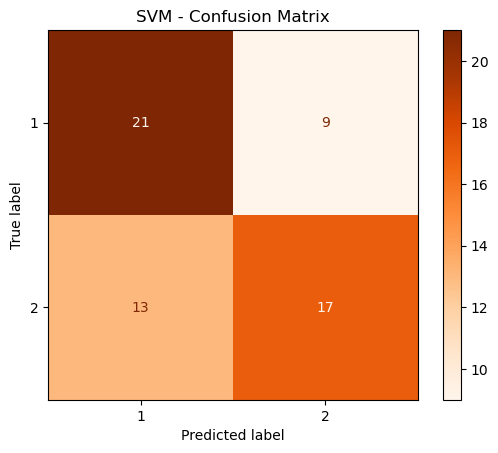

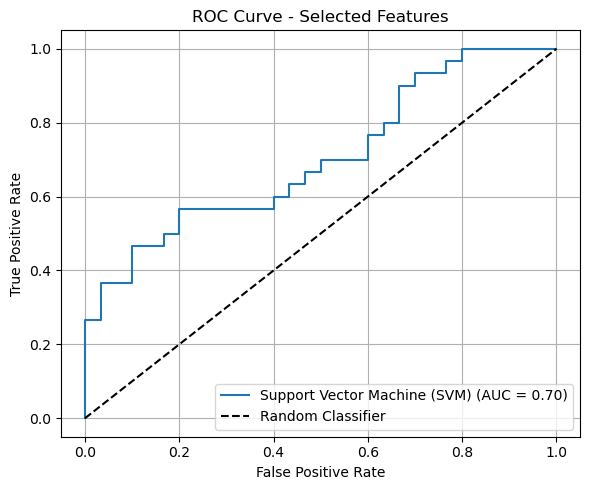

SVM Cross-Validated Accuracy: 0.6741 ± 0.0542


In [20]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

#Defining the mode and fitting using the selected features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

#Ftting the model, predictions and evaluation
SVM = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
y_prob_svm = SVM.predict_proba(X_test)[:, 1]
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_prob_svm)
svm_report = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM ROC AUC Score: {svm_roc_auc:.4f}")
print("SVM Classification Report:\n", svm_report)
print("Confusion Matrix:\n", cm)

##Evaluation Visualisation
#Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Oranges')
plt.title('SVM - Confusion Matrix')
plt.show()

#ROC Curve and cross-validation
plot_roc_curves([
    ('Support Vector Machine (SVM)', SVM, X_test)
], y_test_binary)
mean_acc, std_acc = cross_validate_model(SVM, X_train, y_train)
print(f"SVM Cross-Validated Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")


SVM Accuracy (selected features): 0.9667
SVM ROC AUC Score (selected features): 0.9967
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        30
           2       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<Figure size 600x400 with 0 Axes>

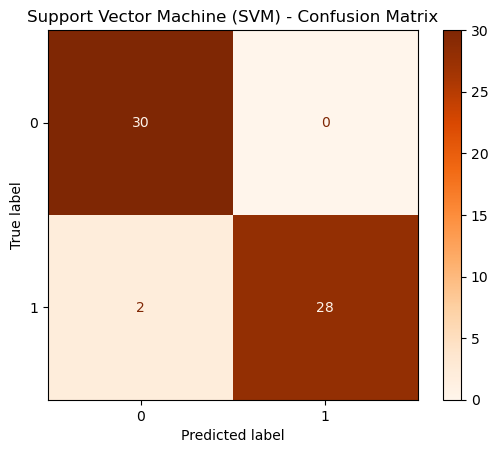

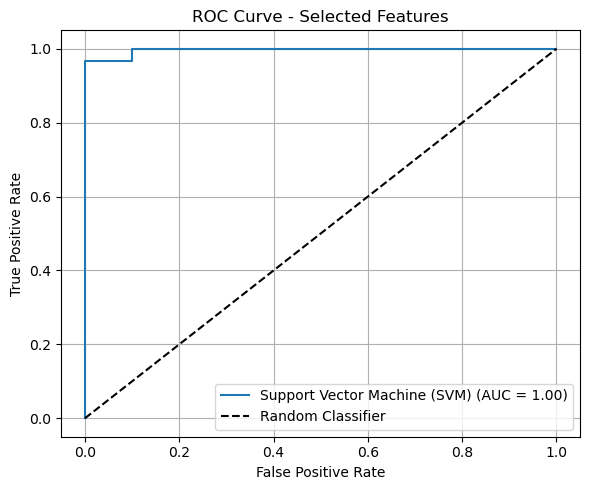

SVM Cross-Validation Accuracy (selected features): 0.9929 ± 0.0143


In [14]:
#Model 5B – Support Vector Machine (SVM) on Selected Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)

#Splitting, scaling and feature selectio using ANOVA Fvalues
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=60, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)
selected_feature_names = X.columns[feature_selector.get_support()]

#Defining and training SVM model
SVM = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
SVM.fit(X_train_selected, y_train)

#Predictions & evaluation
y_pred_svm = SVM.predict(X_test_selected)
y_prob_svm = SVM.predict_proba(X_test_selected)[:, 1]
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test.replace({1: 0, 2: 1}), y_prob_svm)
svm_report = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy (selected features): {svm_accuracy:.4f}')
print(f'SVM ROC AUC Score (selected features): {svm_roc_auc:.4f}')
print('SVM Classification Report:\n', svm_report)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Oranges')
plt.title('Support Vector Machine (SVM) - Confusion Matrix')
plt.show()

#ROC Curve and cross-validation
y_test_binary = y_test.replace({1: 0, 2: 1})
def plot_roc_curves(models, y_test, title='ROC Curve - Selected Features'):
    plt.figure(figsize=(6, 5))
    for name, model, X_t in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_t)[:, 1]
        else:
            y_prob = model.decision_function(X_t)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_val:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves([('Support Vector Machine (SVM)', SVM, X_test_selected)], y_test_binary)

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

mean_acc, std_acc = cross_validate_model(SVM, X_train_selected, y_train)
print(f"SVM Cross-Validation Accuracy (selected features): {mean_acc:.4f} ± {std_acc:.4f}")

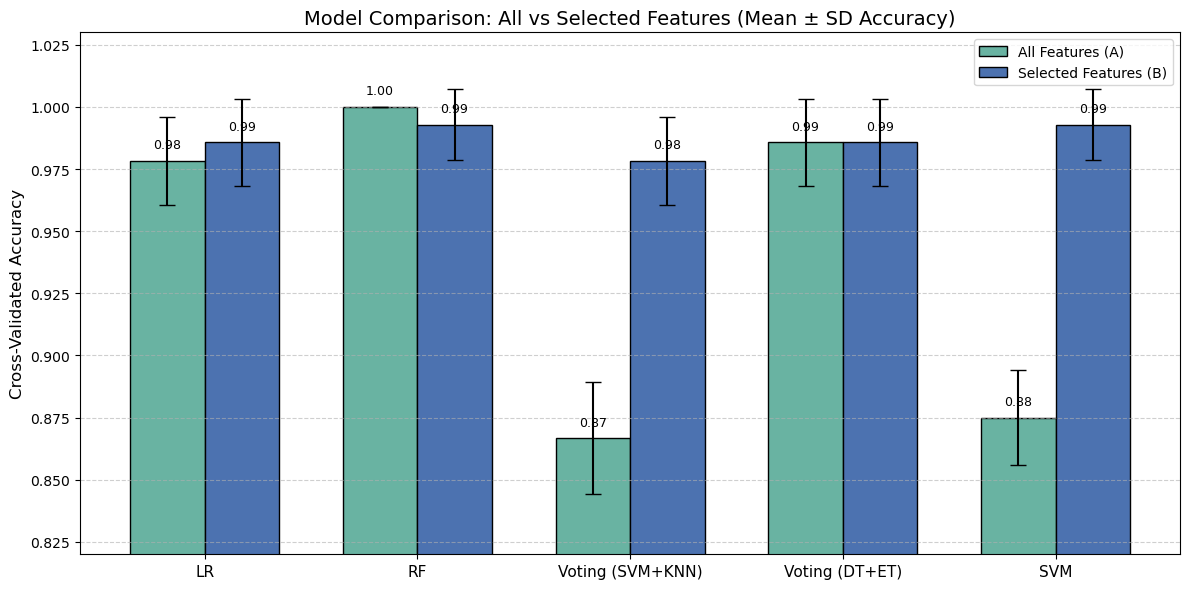

In [15]:
##Combined bar chart of all 10 models using All features (A models) vs Selected features (B models)
import matplotlib.pyplot as plt
import numpy as np

#Same A & B Models
models = ["LR", "RF", "Voting (SVM+KNN)", "Voting (DT+ET)", "SVM"]
x = np.arange(len(models))
width = 0.35

#A Models (All Features)
means_A = [0.9783, 1.0000, 0.8667, 0.9857, 0.8750]
stds_A = [0.0177, 0.0000, 0.0225, 0.0175, 0.0192]
#B Models (Selected Features)
means_B = [0.9857, 0.9929, 0.9783, 0.9857, 0.9929]
stds_B  = [0.0175, 0.0143, 0.0177, 0.0175, 0.0143]

#Plotting the graph and adding text labels
fig, ax = plt.subplots(figsize=(12, 6))
bars_A = ax.bar(x - width/2, means_A, width, yerr=stds_A, capsize=6, label='All Features (A)', color='#69b3a2', edgecolor='black')
bars_B = ax.bar(x + width/2, means_B, width, yerr=stds_B, capsize=6, label='Selected Features (B)', color='#4c72b0', edgecolor='black')

for bar in bars_A:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2f}", ha='center', fontsize=9)
for bar in bars_B:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2f}", ha='center', fontsize=9)

#Printing and formatting
ax.set_ylabel('Cross-Validated Accuracy', fontsize=12)
ax.set_title('Model Comparison: All vs Selected Features (Mean ± SD Accuracy)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0.82, 1.03)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

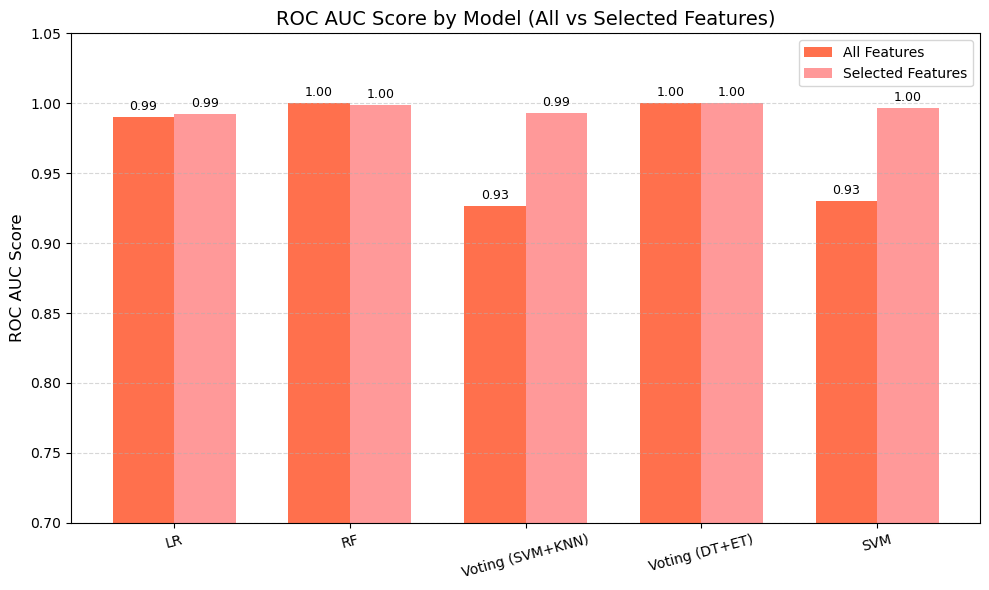

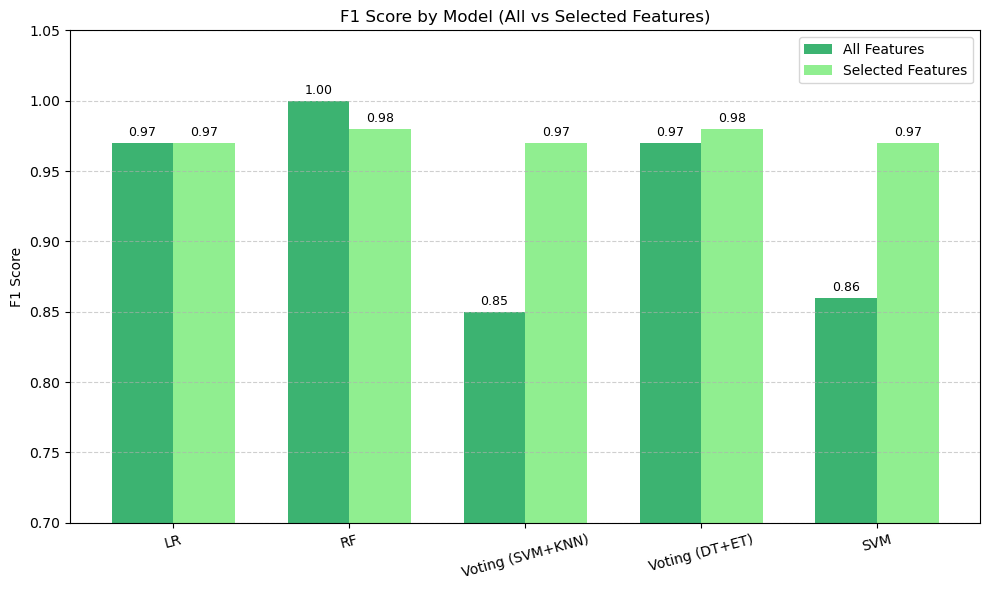

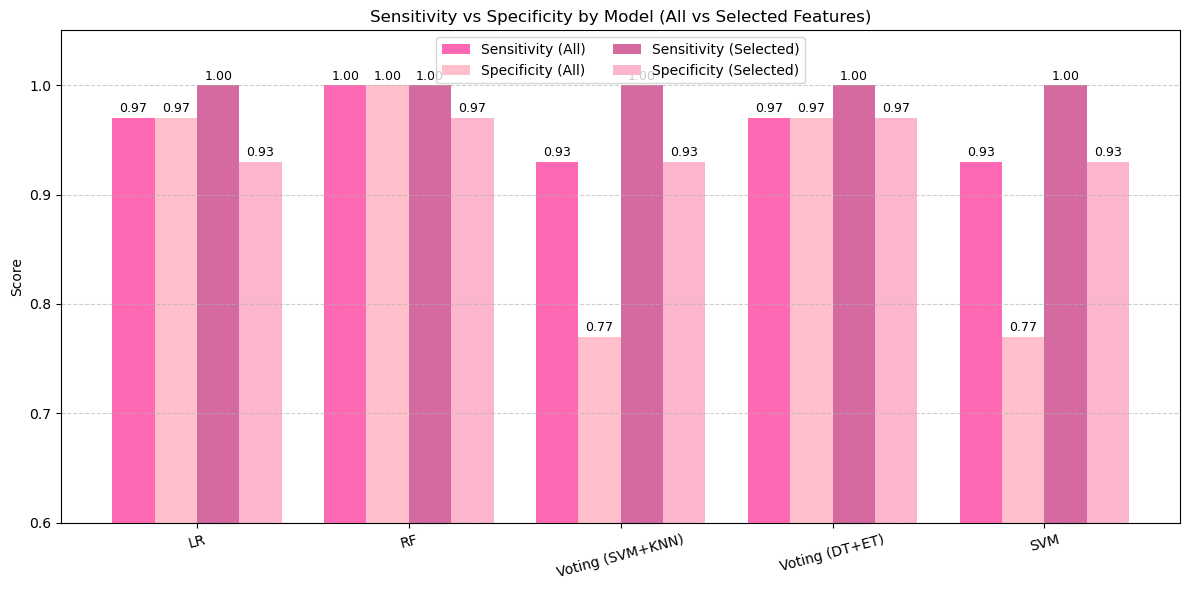

In [16]:
import matplotlib.pyplot as plt
import numpy as np
models = ["LR", "RF", "Voting (SVM+KNN)", "Voting (DT+ET)", "SVM"]
x = np.arange(len(models))
width = 0.35

#ROC AUC Bar:
auc_full =     [0.9900, 1.0000, 0.9267, 1.0000, 0.9300]
auc_selected = [0.9922, 0.9989, 0.9933, 1.0000, 0.9967]

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, auc_full, width, label='All Features', color='#ff704d')
bars2 = plt.bar(x + width/2, auc_selected, width, label='Selected Features', color='#ff9999')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.2f}", ha='center', fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.2f}", ha='center', fontsize=9)

plt.ylabel('ROC AUC Score', fontsize=12)
plt.title('ROC AUC Score by Model (All vs Selected Features)', fontsize=14)
plt.xticks(x, models, rotation=15)
plt.ylim(0.7, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#Bar chart for F1 scores
f1_full =     [0.97, 1.00, 0.85, 0.97, 0.86] 
f1_selected = [0.97, 0.98, 0.97, 0.98, 0.97]

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, f1_full, width, label='All Features', color='mediumseagreen')
bars2 = plt.bar(x + width/2, f1_selected, width, label='Selected Features', color='lightgreen')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.2f}", ha='center', fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.2f}", ha='center', fontsize=9)

plt.ylabel("F1 Score")
plt.title("F1 Score by Model (All vs Selected Features)")
plt.xticks(x, models, rotation=15)
plt.ylim(0.7, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Lastly sensitivity vs specificity chart
sensitivity_full = [0.97, 1.00, 0.93, 0.97, 0.93]
specificity_full = [0.97, 1.00, 0.77, 0.97, 0.77]

sensitivity_selected = [1.00, 1.00, 1.00, 1.00, 1.00] 
specificity_selected = [0.93, 0.97, 0.93, 0.97, 0.93]

width = 0.2

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - 1.5*width, sensitivity_full, width, label='Sensitivity (All)', color='#ff69b4')
bars2 = plt.bar(x - 0.5*width, specificity_full, width, label='Specificity (All)', color='#ffc0cb')
bars3 = plt.bar(x + 0.5*width, sensitivity_selected, width, label='Sensitivity (Selected)', color='#d46a9f')
bars4 = plt.bar(x + 1.5*width, specificity_selected, width, label='Specificity (Selected)', color='#fbb6ce')

#Added text to labels so it is easier to see the difference
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.2f}", ha='center', fontsize=9)

plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.title("Sensitivity vs Specificity by Model (All vs Selected Features)")
plt.ylim(0.6, 1.05)
plt.legend(loc='upper center', ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

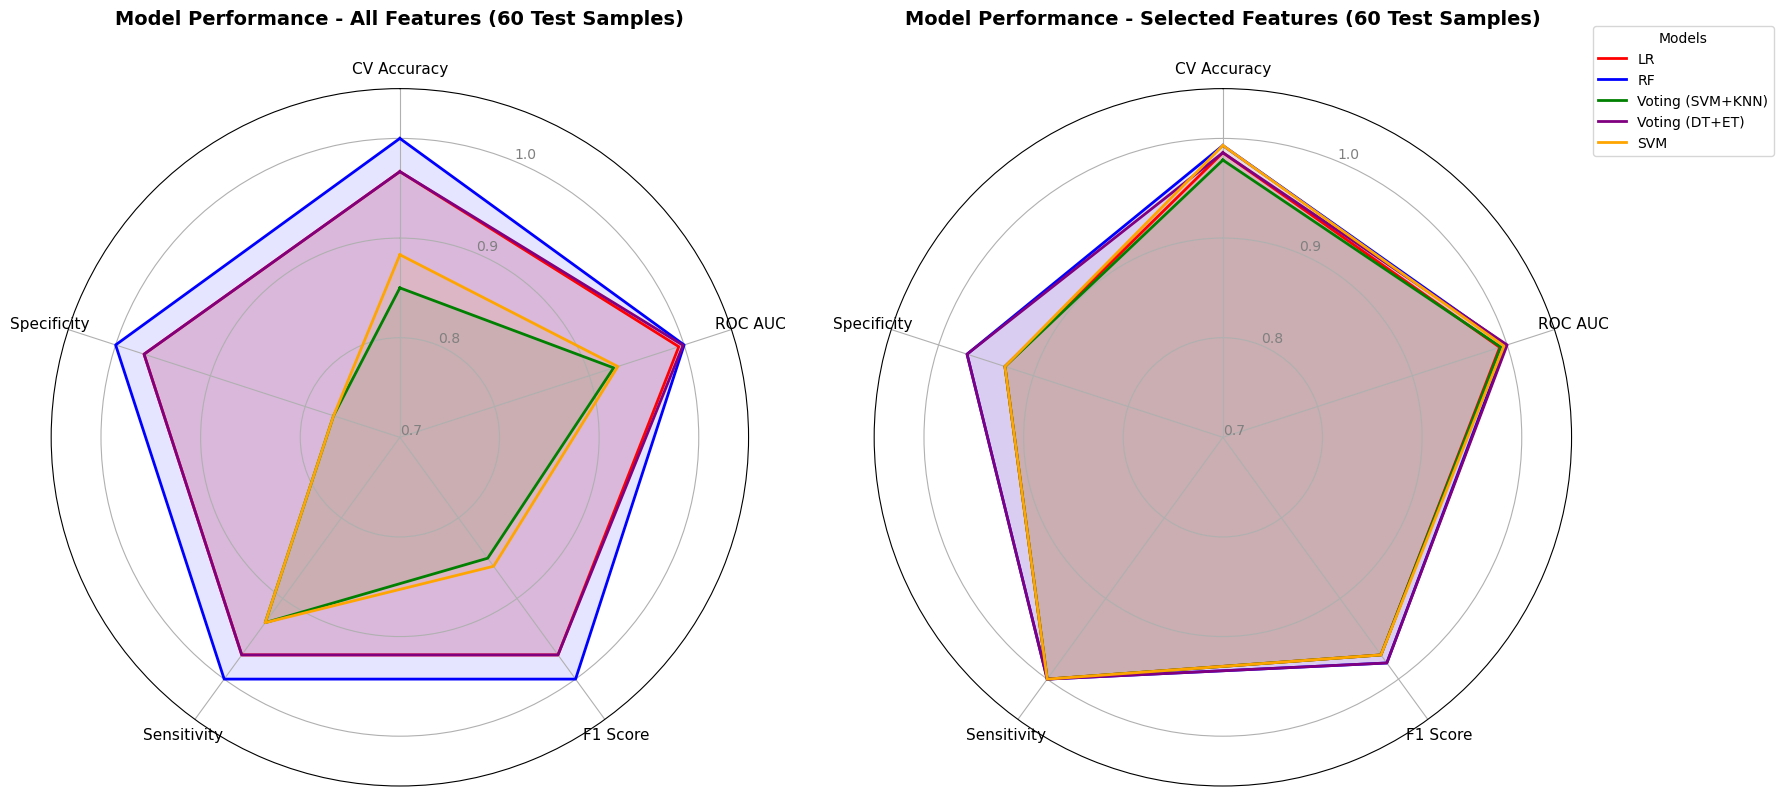

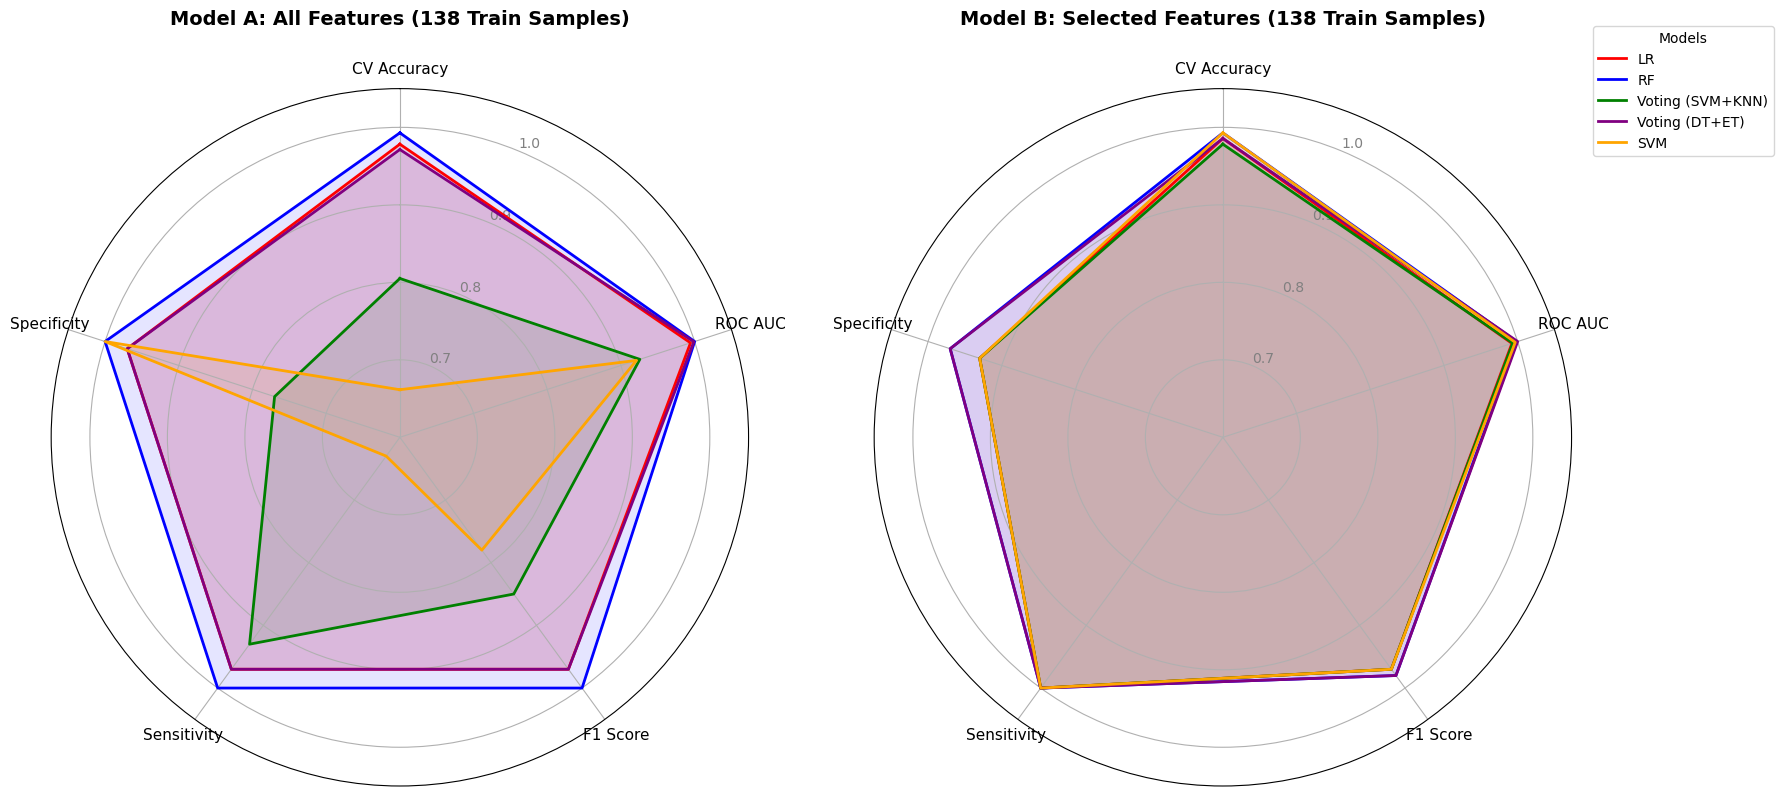

In [17]:
##Test Sampled Radar for 60 Samples
import matplotlib.pyplot as plt
from math import pi
import numpy as np

#Adding labels to my radar chart
radar_labels = ['CV Accuracy', 'ROC AUC', 'F1 Score', 'Sensitivity', 'Specificity']
angles = [n / float(len(radar_labels)) * 2 * pi for n in range(len(radar_labels))]
angles += angles[:1]  # Loop back to the start

#Model names & data
models = ["LR", "RF", "Voting (SVM+KNN)", "Voting (DT+ET)", "SVM"]
radar_data_all = [[0.9667, 0.9944, 0.97, 0.97, 0.97],
    [1.0000, 1.0000, 1.00, 1.00, 1.00],
    [0.8500, 0.9256, 0.85, 0.93, 0.77],
    [0.9667, 0.9989, 0.97, 0.97, 0.97],
    [0.8833, 0.9300, 0.86, 0.93, 0.77]]

radar_data_selected = [[0.9857, 0.9922, 0.97, 1.00, 0.93],
    [0.9929, 0.9989, 0.98, 1.00, 0.97],
    [0.9783, 0.9933, 0.97, 1.00, 0.93],
    [0.9857, 1.0000, 0.98, 1.00, 0.97],
    [0.9929, 0.9967, 0.97, 1.00, 0.93]]

colors = ['red', 'blue', 'green', 'purple', 'orange']

#Making some subplots for the All vs Selected Features
fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw=dict(polar=True))
titles = ["Model Performance - All Features (60 Test Samples)", "Model Performance - Selected Features (60 Test Samples)"]
data_sets = [radar_data_all, radar_data_selected]
for ax, title, data in zip(axs, titles, data_sets):
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_ylim(0.7, 1.05)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_labels, fontsize=11)
    ax.set_yticks([0.7, 0.8, 0.9, 1.0])
    ax.set_yticklabels(["0.7", "0.8", "0.9", "1.0"], fontsize=10, color="grey")
    ax.set_title(title, size=14, fontweight='bold', y=1.08)

    for i, model in enumerate(models):
        values = data[i] + data[i][:1]
        ax.plot(angles, values, label=model, color=colors[i], linewidth=2)
        ax.fill(angles, values, color=colors[i], alpha=0.1)

#Just adding some legends fro readability
axs[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title="Models")
plt.tight_layout()
plt.show()

##Trained data of 138 Samples
#Manually input & updating the metrics here based on your actual evaluation results
radar_labels = ['CV Accuracy', 'ROC AUC', 'F1 Score', 'Sensitivity', 'Specificity']
angles = [n / float(len(radar_labels)) * 2 * pi for n in range(len(radar_labels))]
angles += angles[:1]  # Close the loop

models = ["LR", "RF", "Voting (SVM+KNN)", "Voting (DT+ET)", "SVM"]
radar_data_all = [[0.9783, 0.9944, 0.97, 0.97, 0.97], 
    [0.9929, 1.0000, 1.00, 1.00, 1.00],
    [0.8050, 0.9256, 0.85, 0.93, 0.77], 
    [0.9714, 0.9989, 0.97, 0.97, 0.97],  
    [0.6614, 0.9211, 0.78, 0.63, 1.00]]

radar_data_selected = [
    [0.9857, 0.9922, 0.97, 1.00, 0.93], 
    [0.9929, 0.9989, 0.98, 1.00, 0.97], 
    [0.9783, 0.9933, 0.97, 1.00, 0.93], 
    [0.9857, 1.0000, 0.98, 1.00, 0.97], 
    [0.9929, 0.9967, 0.97, 1.00, 0.93]]

colors = ['red', 'blue', 'green', 'purple', 'orange']

#Making the 2 radar charts sit next to each other
fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw=dict(polar=True))
titles = ["Model A: All Features (138 Train Samples)", "Model B: Selected Features (138 Train Samples)"]
data_sets = [radar_data_all, radar_data_selected]

for ax, title, data in zip(axs, titles, data_sets):
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_ylim(0.6, 1.05)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_labels, fontsize=11)
    ax.set_yticks([0.7, 0.8, 0.9, 1.0])
    ax.set_yticklabels(["0.7", "0.8", "0.9", "1.0"], fontsize=10, color="grey")
    ax.set_title(title, size=14, fontweight='bold', y=1.08)

    for i, model in enumerate(models):
        values = data[i] + data[i][:1]
        ax.plot(angles, values, label=model, color=colors[i], linewidth=2)
        ax.fill(angles, values, color=colors[i], alpha=0.1)
axs[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title="Models")
plt.tight_layout()
plt.show()


Model 1A: LR (All Features)
Accuracy: 0.8768 | AUC: 0.9282
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.97      0.89        69
           2       0.96      0.78      0.86        69

    accuracy                           0.88       138
   macro avg       0.89      0.88      0.88       138
weighted avg       0.89      0.88      0.88       138


Model 1B: LR (Selected Features)
Accuracy: 0.9855 | AUC: 0.9956
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.99        69
           2       0.97      1.00      0.99        69

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138


Model 2A: RF (All Features)
Accuracy: 0.9928 | AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99 

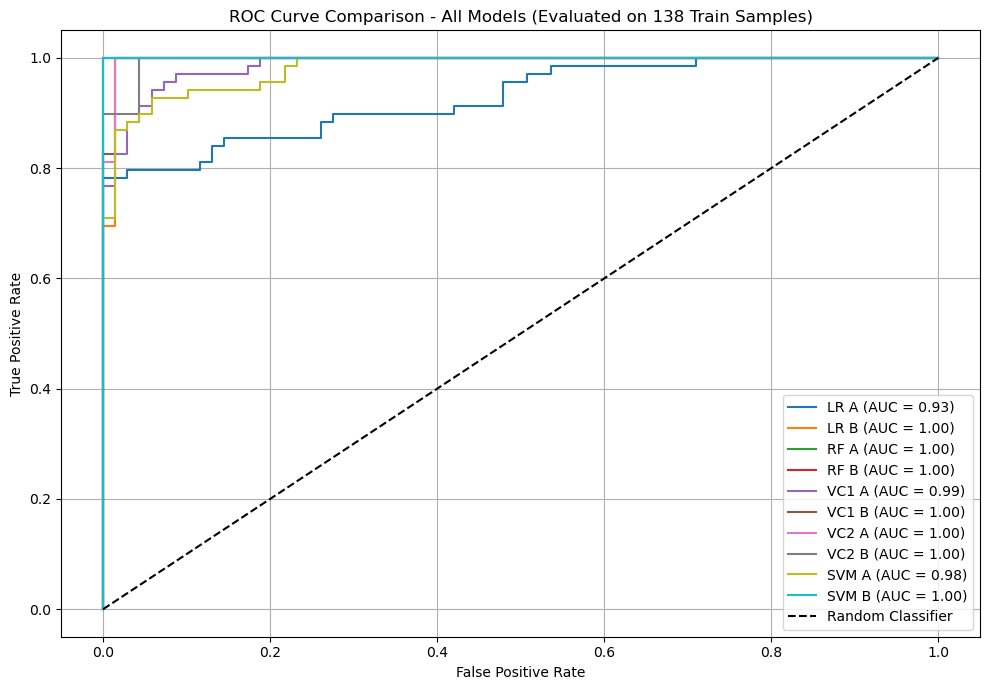

In [18]:
####Epilepsy Detection on all 10 Models (A & B)
#A Models = All Features
#B Models = Selected Features
#Models: LR, RF, Voting (SVM+KNN), Voting (DT+ET), SVM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc

#Reloading the data and ensuring this is tested on my 138 samples
EEGdata = pd.read_csv("Epileptic_data.csv")
X = EEGdata.drop(columns=["ID", "stat"])
y = EEGdata["stat"]
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=60, stratify=y, random_state=42)

#Scaling and feature selecting the top 10
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)

#Doing the binary labels for ROC AUC
y_test_binary = y_test.replace({1: 0, 2: 1})

#Evaluation 
def evaluate_model(name, model, X_eval, y_eval, binary_labels):
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_eval)
    acc = accuracy_score(y_eval, y_pred)
    auc_score_val = roc_auc_score(binary_labels, y_prob)
    report = classification_report(y_eval, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f} | AUC: {auc_score_val:.4f}")
    print("Classification Report:\n", report)
    return y_pred, y_prob
roc_models = []

#LR model
lr_param = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
lr_A = GridSearchCV(LogisticRegression(max_iter=1000), lr_param, cv=5).fit(X_train_scaled, y_train).best_estimator_
lr_B = GridSearchCV(LogisticRegression(max_iter=1000), lr_param, cv=5).fit(X_train_sel_scaled, y_train).best_estimator_

yp_lrA, pr_lrA = evaluate_model("Model 1A: LR (All Features)", lr_A, X_test_scaled, y_test, y_test_binary)
yp_lrB, pr_lrB = evaluate_model("Model 1B: LR (Selected Features)", lr_B, X_test_sel_scaled, y_test, y_test_binary)

roc_models.append(("LR A", pr_lrA))
roc_models.append(("LR B", pr_lrB))

#RF model
rf_A = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
rf_B = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_sel_scaled, y_train)

yp_rfA, pr_rfA = evaluate_model("Model 2A: RF (All Features)", rf_A, X_test_scaled, y_test, y_test_binary)
yp_rfB, pr_rfB = evaluate_model("Model 2B: RF (Selected Features)", rf_B, X_test_sel_scaled, y_test, y_test_binary)

roc_models.append(("RF A", pr_rfA))
roc_models.append(("RF B", pr_rfB))

#SVM KNN model
vc1_A = VotingClassifier(estimators=[
    ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))], voting='soft').fit(X_train_scaled, y_train)

vc1_B = VotingClassifier(estimators=[('svm', SVC(kernel='rbf', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
], voting='soft').fit(X_train_sel_scaled, y_train)

yp_vc1A, pr_vc1A = evaluate_model("Model 3A: Voting (SVM+KNN All)", vc1_A, X_test_scaled, y_test, y_test_binary)
yp_vc1B, pr_vc1B = evaluate_model("Model 3B: Voting (SVM+KNN Selected)", vc1_B, X_test_sel_scaled, y_test, y_test_binary)
roc_models.append(("VC1 A", pr_vc1A))
roc_models.append(("VC1 B", pr_vc1B))

#DTET model
vc2_A = VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
], voting='soft').fit(X_train_scaled, y_train)
vc2_B = VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))], voting='soft').fit(X_train_sel_scaled, y_train)

yp_vc2A, pr_vc2A = evaluate_model("Model 4A: Voting (DT+ET All)", vc2_A, X_test_scaled, y_test, y_test_binary)
yp_vc2B, pr_vc2B = evaluate_model("Model 4B: Voting (DT+ET Selected)", vc2_B, X_test_sel_scaled, y_test, y_test_binary)
roc_models.append(("VC2 A", pr_vc2A))
roc_models.append(("VC2 B", pr_vc2B))

#SVM Model
svm_A = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train_scaled, y_train)
svm_B = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train_sel_scaled, y_train)
yp_svmA, pr_svmA = evaluate_model("Model 5A: SVM (All Features)", svm_A, X_test_scaled, y_test, y_test_binary)
yp_svmB, pr_svmB = evaluate_model("Model 5B: SVM (Selected Features)", svm_B, X_test_sel_scaled, y_test, y_test_binary)
roc_models.append(("SVM A", pr_svmA))
roc_models.append(("SVM B", pr_svmB))

#ROC Comparison of all 10 modeks
plt.figure(figsize=(10, 7))
for label, probs in roc_models:
    fpr, tpr, _ = roc_curve(y_test_binary, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve Comparison - All Models (Evaluated on 138 Train Samples)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

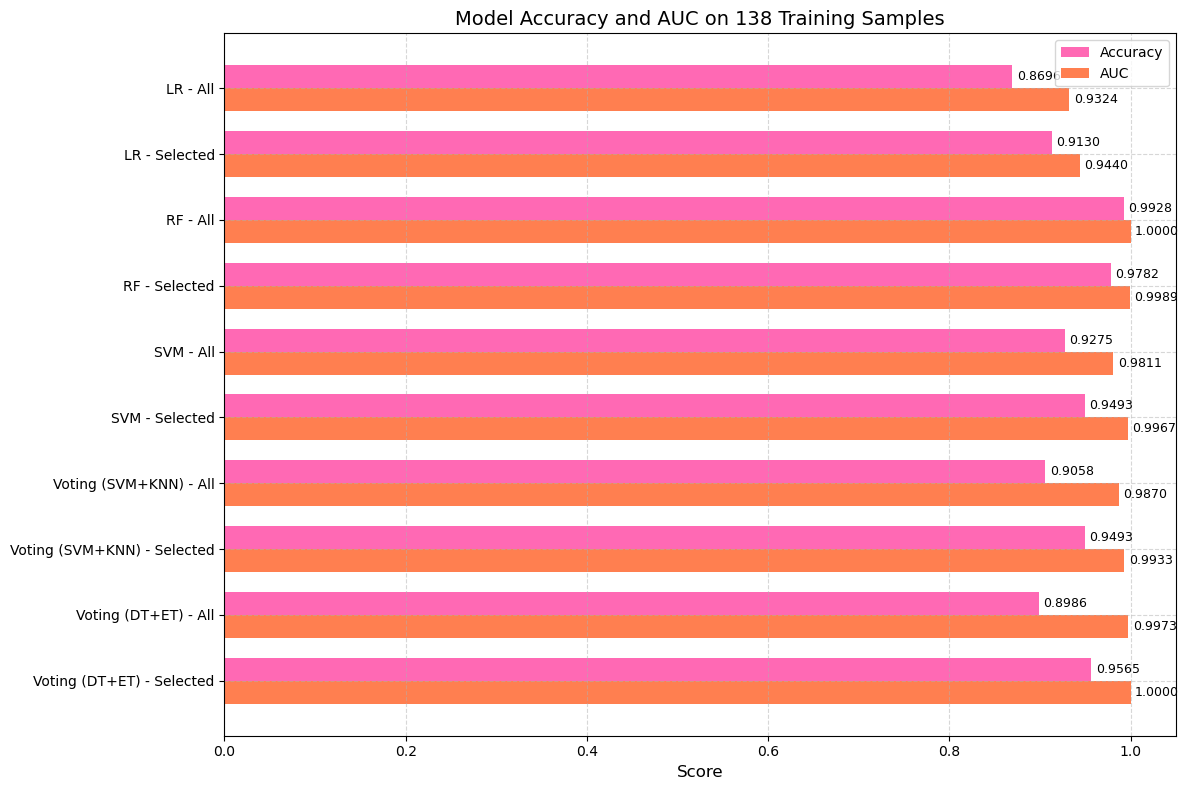

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Model results based on TRAINING SET (138 samples)
model_results = {'LR - All': {'Accuracy': 0.8696, 'AUC': 0.9324},
    'LR - Selected': {'Accuracy': 0.9130, 'AUC': 0.9440},
    'RF - All': {'Accuracy': 0.9928, 'AUC': 1.0000},
    'RF - Selected': {'Accuracy': 0.9782, 'AUC': 0.9989},
    'SVM - All': {'Accuracy': 0.9275, 'AUC': 0.9811},
    'SVM - Selected': {'Accuracy': 0.9493, 'AUC': 0.9967},
    'Voting (SVM+KNN) - All': {'Accuracy': 0.9058, 'AUC': 0.9870},
    'Voting (SVM+KNN) - Selected': {'Accuracy': 0.9493, 'AUC': 0.9933},
    'Voting (DT+ET) - All': {'Accuracy': 0.8986, 'AUC': 0.9973},
    'Voting (DT+ET) - Selected': {'Accuracy': 0.9565, 'AUC': 1.0000}}

#Getting my data & plotting
labels = list(model_results.keys())
accuracy = [model_results[m]['Accuracy'] for m in labels]
roc_auc = [model_results[m]['AUC'] for m in labels]
y_pos = np.arange(len(labels))
height = 0.35
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(y_pos - height/2, accuracy, height, label='Accuracy', color='hotpink')
bars2 = ax.barh(y_pos + height/2, roc_auc, height, label='AUC', color='coral')

#Adding the values and chart settings
for bar in bars1:
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
            f"{bar.get_width():.4f}", va='center', fontsize=9)

for bar in bars2:
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
            f"{bar.get_width():.4f}", va='center', fontsize=9)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=10)
ax.invert_yaxis()
ax.set_xlabel('Score', fontsize=12)
ax.set_title('Model Accuracy and AUC on 138 Training Samples', fontsize=14)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()